# Modelo ML

In [1]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path donde se encuentran mis archivos train
BASE_PATH = "../data/processed"
TRAIN_PATHS = [
    "X_train_con_outliers_raw.xlsx",
    "X_train_sin_outliers_raw.xlsx",
]

# Guardo cada uno de estos archivos dentro de una lista
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

# Path donde se encuentran mis archivos test
TEST_PATHS = [
    "X_test_con_outliers_raw.xlsx",
    "X_test_sin_outliers_raw.xlsx",
]

# Guardo cada uno de estos archivos dentro de una lista
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

### Entreno un modelo por cada uno de mis datasets

In [3]:
results = []

for index, dataset in enumerate(TRAIN_DATASETS):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])
    
    results.append({
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "train_f1": f1_score(y_train, y_pred_train),
        "test_f1": f1_score(y_test, y_pred_test)
    })

df_results = pd.DataFrame(results)
print(df_results)

#    train_accuracy  test_accuracy  train_f1   test_f1
# 0             1.0       0.746753       1.0  0.672269
# 1             1.0       0.733766       1.0  0.643478

#   train_accuracy  test_accuracy  train_f1   test_f1
#0             1.0       0.720779       1.0  0.619469
#1             1.0       0.753247       1.0  0.660714

   train_accuracy  test_accuracy  train_f1   test_f1
0             1.0       0.831169       1.0  0.767857
1             1.0       0.837662       1.0  0.766355


## Optimizacion del modelo

In [4]:
param_grid = {
    'criterion': ['gini'],              # Fijo, ya que 'gini' fue óptimo.
    'max_depth': [5],                   # Fijo en 5, según los mejores hiperparámetros.
    'min_samples_split': [2],           # Fijo en 2.
    'min_samples_leaf': [2],            # Fijo en 2.
    'max_features': ['log2'],           # Fijo en 'log2'.
    'max_leaf_nodes': [None],           # Fijo en None.
    # Hiperparámetros adicionales:
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02],
    'min_impurity_decrease': [0.0, 0.001, 0.005],
    'ccp_alpha': [0.0, 0.001, 0.005],
    'class_weight': [None, 'balanced']
}

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

best_dataset = 1

model_optimized = DecisionTreeClassifier(random_state= 42)

grid_optimized = GridSearchCV(estimator = model_optimized, param_grid = param_grid, scoring = 'accuracy', cv = 5, n_jobs = 14)


grid_optimized.fit(TRAIN_DATASETS[best_dataset], y_train)
best_model = grid_optimized.best_estimator_


y_pred_train = best_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = best_model.predict(TEST_DATASETS[best_dataset])


results_optimized = []

results_optimized.append({
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "train_f1": f1_score(y_train, y_pred_train),
        "test_f1": f1_score(y_test, y_pred_test)
    })

df_optimized = pd.DataFrame(results_optimized)

print(df_optimized)
print('-----------------------')
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_test)}")

#   train_accuracy  test_accuracy  train_f1  test_f1
#0        0.833876       0.727273  0.755981    0.625

#   train_accuracy  test_accuracy  train_f1   test_f1
#0        0.942997       0.837662  0.915663  0.782609

#   train_accuracy  test_accuracy  train_f1   test_f1  2
#0        0.941368       0.857143  0.913462  0.796296



#   train_accuracy  test_accuracy  train_f1   test_f1
#0        0.876221       0.857143  0.816425  0.803571
#-----------------------
#Error cuadrático medio: 0.14285714285714285

# Best
#  train_accuracy  test_accuracy  train_f1  test_f1
# 0        0.912052       0.883117  0.869565     0.82

print("Mejores hiperparámetros:", grid_optimized.best_params_)

   train_accuracy  test_accuracy  train_f1  test_f1
0        0.912052       0.883117  0.869565     0.82
-----------------------
Error cuadrático medio: 0.11688311688311688
Mejores hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


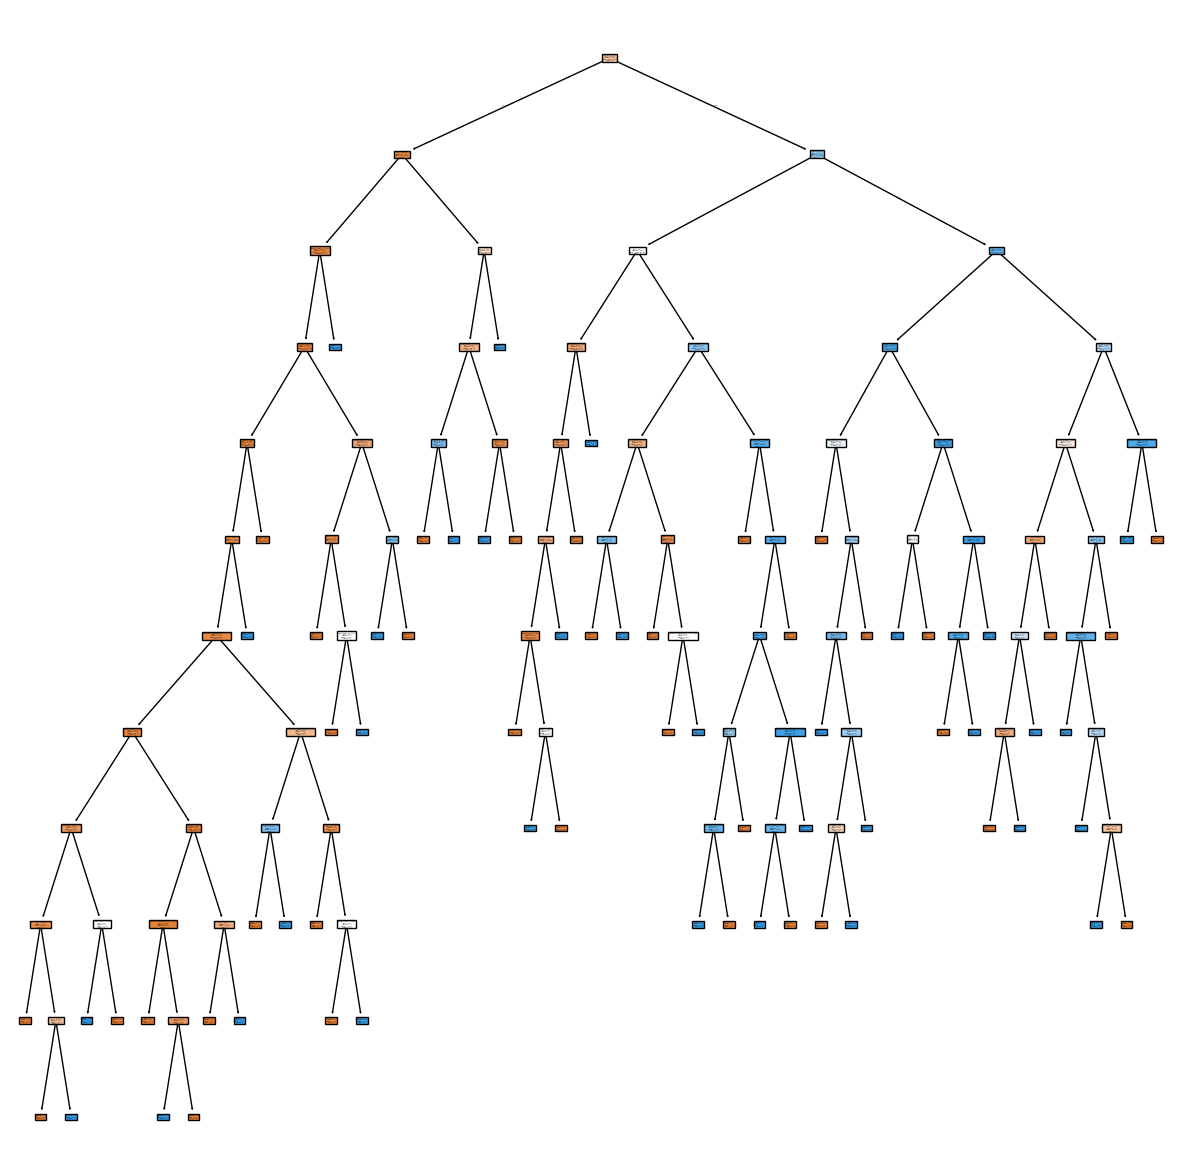

In [6]:
from sklearn import tree



fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(TRAIN_DATASETS[best_dataset].columns), class_names = ["0", "1", "2"], filled = True)

plt.show()